In [263]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [264]:
data=pd.read_csv("Tourism.csv")

In [265]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [266]:
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

# Data Preprocessing Part 1

## Fixing the data types

* TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus are of object type, we can change them to nominal categories.
* Designation is converted to ordered category later on below

In [268]:
data["TypeofContact"] = data["TypeofContact"].astype("category")
data["Occupation"] = data["Occupation"].astype("category")
data["Gender"] = data["Gender"].astype("category")
data["ProductPitched"] = data["ProductPitched"].astype("category")
data["MaritalStatus"] = data["MaritalStatus"].astype("category")

In [269]:
data.isna().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

- Filling missing MonthlyIncome and age with mean, DurationOfPitch,NumberOfTrips,NumberOfChildrenVisited,NumberOfFollowups with median

In [270]:
data['MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].mean())
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['DurationOfPitch'] = data['DurationOfPitch'].fillna(data['DurationOfPitch'].median())
data['NumberOfTrips'] = data['NumberOfTrips'].fillna(data['NumberOfTrips'].median())
data['NumberOfChildrenVisited'] = data['NumberOfChildrenVisited'].fillna(data['NumberOfChildrenVisited'].median())
data['NumberOfFollowups'] = data['NumberOfFollowups'].fillna(data['NumberOfFollowups'].median())


- Delete row where PreferredPropertyStar and TypeofContact is NaN since there are only 25 of them

In [271]:
data.dropna(subset=['PreferredPropertyStar'], inplace = True)
data.dropna(subset=['TypeofContact'], inplace = True)

In [272]:
data.shape

(4837, 20)

In [273]:
# Summary of continuous columns
data[['ProdTaken','Age','CityTier','DurationOfPitch','Occupation','Gender','NumberOfPersonVisited','ProductPitched','PreferredPropertyStar','MaritalStatus','Passport','PitchSatisfactionScore','OwnCar','Designation']].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4837.0,0.188340,0.391024,0.0,0.0,0.0,0.0,1.0
Age,4837.0,37.592026,9.062954,18.0,31.0,37.0,43.0,61.0
CityTier,4837.0,1.655158,0.917030,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4837.0,15.380401,8.336915,5.0,9.0,13.0,19.0,127.0
NumberOfPersonVisited,4837.0,2.904900,0.724191,1.0,2.0,3.0,3.0,5.0
PreferredPropertyStar,4837.0,3.581766,0.797913,3.0,3.0,3.0,4.0,5.0
Passport,4837.0,0.292537,0.454974,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4837.0,3.076907,1.366123,1.0,2.0,3.0,4.0,5.0
OwnCar,4837.0,0.619185,0.485637,0.0,0.0,1.0,1.0,1.0


In [274]:
data.nunique()

CustomerID                 4837
ProdTaken                     2
Age                          45
TypeofContact                 2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2460
dtype: int64

# Feature Engineering

* We can drop 'CustomerID' column as it is an ID variable and will not add value to the model.

In [275]:
data.drop(columns=['CustomerID'], inplace=True)

- **PreferredPropertyStar looks like a category variable sin cethere can be only 5 values 1-5 mostly and in our data there are only 3 unique values**

In [276]:
data["PreferredPropertyStar"] = data["PreferredPropertyStar"].astype("category")

In [277]:
cat_cols=['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']
for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

Self Enquiry       3422
Company Invited    1415
Name: TypeofContact, dtype: int64
------------------------------
Salaried          2347
Small Business    2056
Large Business     432
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------
Male       2887
Female     1795
Fe Male     155
Name: Gender, dtype: int64
------------------------------
Basic           1831
Deluxe          1716
Standard         741
Super Deluxe     342
King             207
Name: ProductPitched, dtype: int64
------------------------------
Married      2311
Divorced      938
Single        906
Unmarried     682
Name: MaritalStatus, dtype: int64
------------------------------
Executive         1831
Manager           1716
Senior Manager     741
AVP                342
VP                 207
Name: Designation, dtype: int64
------------------------------


* replacing "Fe Male" to "Female" 

In [278]:
data.replace(to_replace='Fe Male', value='Female',inplace=True)

In [279]:
data["Designation"] = data["Designation"].astype("category")

In [280]:
data["CityTier"].value_counts()

1    3155
3    1487
2     195
Name: CityTier, dtype: int64


- CityTier has only 3 values and more of a attribute than number so converting to ordinal category

In [281]:
data["CityTier"] = pd.Categorical(data["CityTier"].astype("category"),ordered=True)

In [282]:
data["Passport"].value_counts()

0    3422
1    1415
Name: Passport, dtype: int64

- Passport has only 2 values and more of a attribute than number so converting to category

In [283]:
data["Passport"] = data["Passport"].astype("category")

In [284]:
data["PitchSatisfactionScore"].value_counts()

3    1462
5     959
1     934
4     902
2     580
Name: PitchSatisfactionScore, dtype: int64

- PitchSatisfactionScore has only 5 values and its a rating not a count so converting to  ordinal category

In [285]:
data["PitchSatisfactionScore"] = pd.Categorical(data["PitchSatisfactionScore"].astype("category"),ordered=True)

In [286]:
data["OwnCar"].value_counts()

1    2995
0    1842
Name: OwnCar, dtype: int64

- OwnCar has only 2 values and its a flag not a count so converting to category

In [287]:
data["OwnCar"] = data["OwnCar"].astype("category")

- Converting designation to ordered category

In [288]:
data["Designation"] = pd.Categorical(data["Designation"].astype("category"),['Executive','Manager','Senior Manager','AVP','VP'],ordered=True)

In [289]:
data.Designation=data.Designation.cat.codes


In [290]:
data["PreferredPropertyStar"].value_counts()

3.0    2974
5.0     951
4.0     912
Name: PreferredPropertyStar, dtype: int64

- Converting PreferredPropertyStar to ordered category since its a rating and has only 3 values

In [291]:
data["PreferredPropertyStar"] = pd.Categorical(data["PreferredPropertyStar"].astype("category"),ordered=True)

## EDA

### Univariate analysis

In [292]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

**Observations on Age**

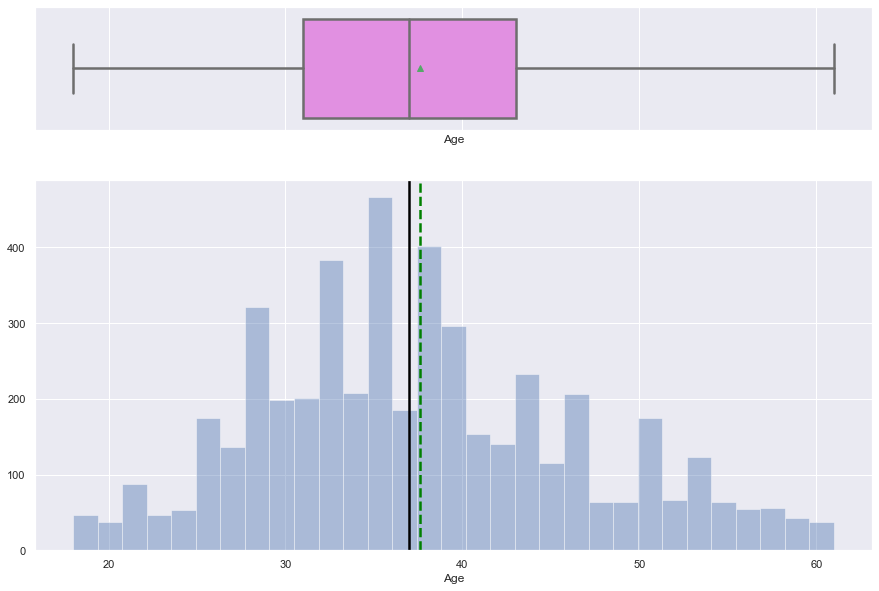

In [293]:
histogram_boxplot(data['Age'])

- **Age seems to be slightly right skewed with mean around 37.6**
- **As evident from the boxplot, there are no outliers in the distribution for this variable**

**Observations on DurationOfPitch**

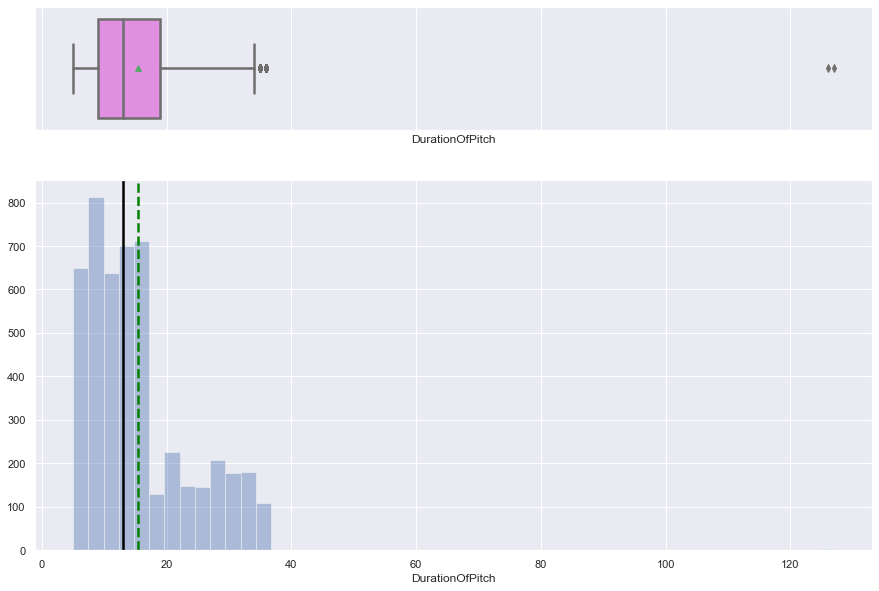

In [294]:
histogram_boxplot(data['DurationOfPitch'])

- DurationOfPitch seems to be heavily right skewed with 2 outliers 126 and 127. We can delete these outliers as they are only 2 and very far from mean and can bias the results

In [295]:
data.drop(data[(data['DurationOfPitch']==126) | (data['DurationOfPitch']==127)].index, inplace = True)

**Observations on NumberOfFollowups**

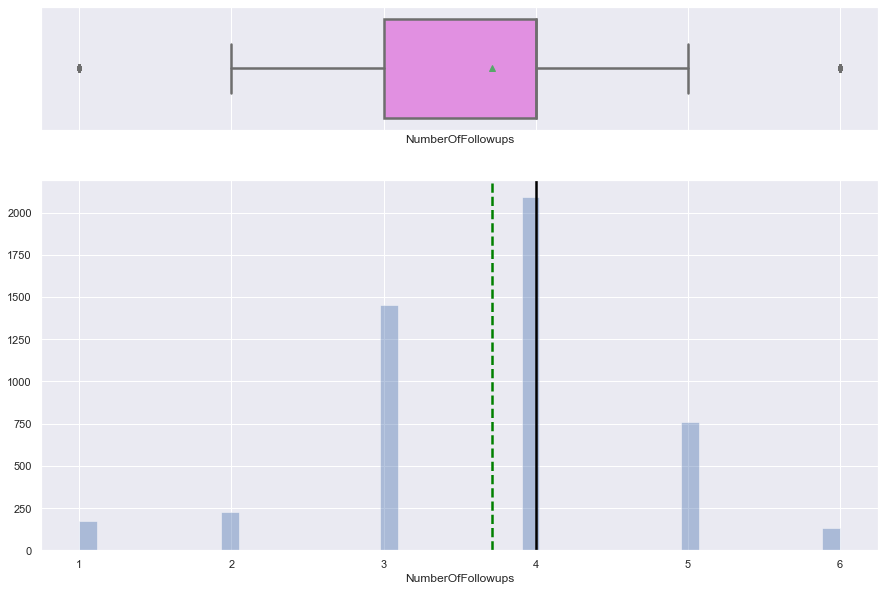

In [296]:
histogram_boxplot(data['NumberOfFollowups'])

- only 6 unique values and normally distributed**

**Observations on NumberOfTrips**

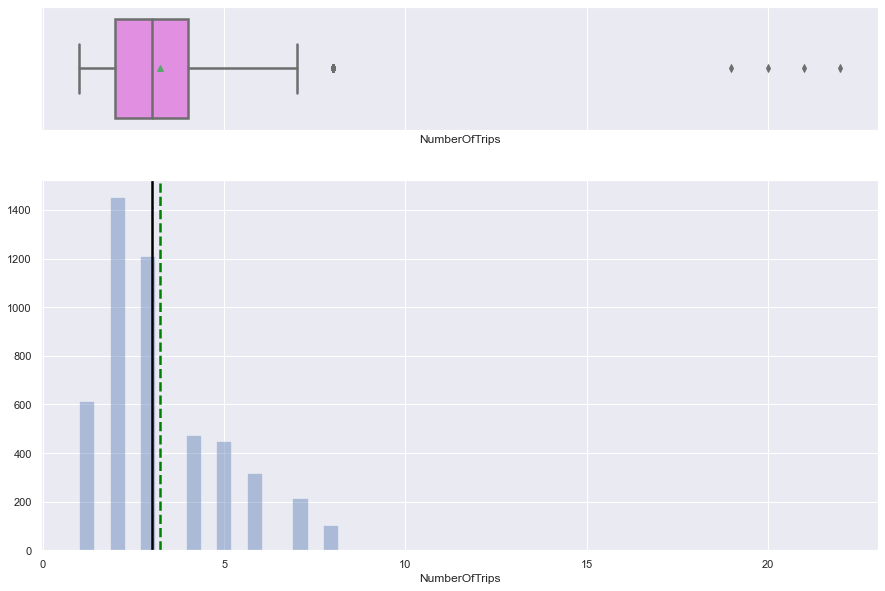

In [297]:
histogram_boxplot(data['NumberOfTrips'])

- NumberOfTrips looks heavily right skewed with 5 outliers. We can delete the last 4 as they are very far from mean and can bias the results

In [298]:
TripsToDelete=[19,20,21,22]
data.drop(data[(data['NumberOfTrips'].isin(TripsToDelete))].index, inplace = True)

**Observations on NumberOfChildrenVisited**

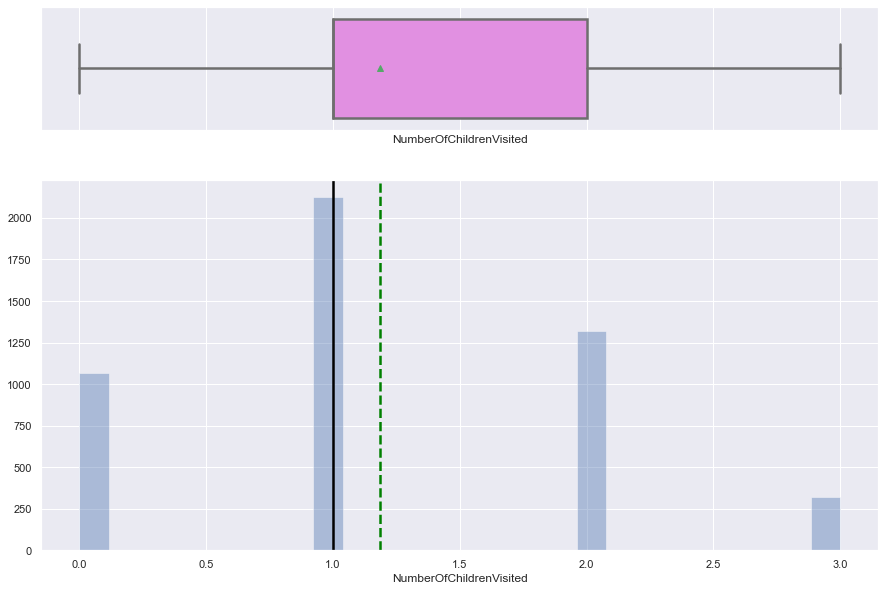

In [299]:
histogram_boxplot(data['NumberOfChildrenVisited'])

-**only 4 unique values and normally distributed**

**Observations on MonthlyIncome**

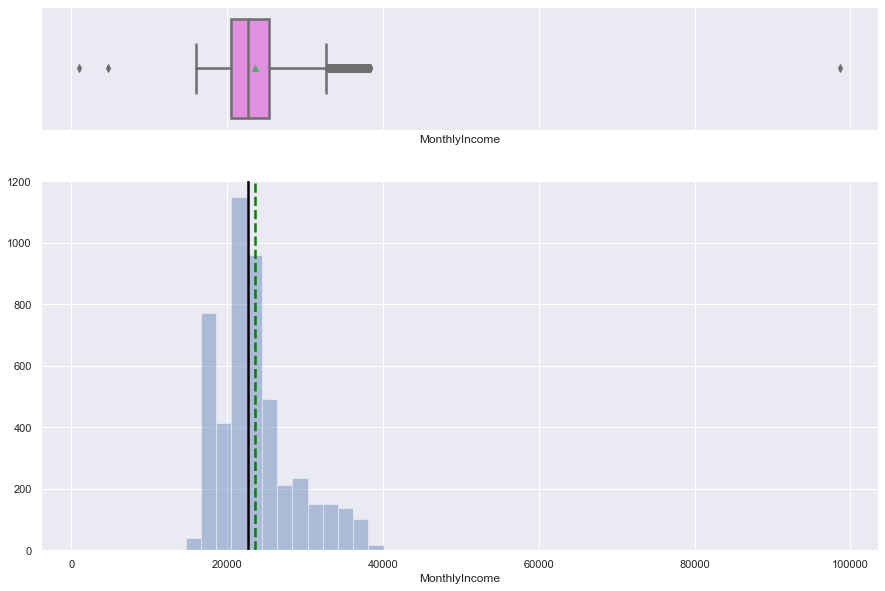

In [300]:
histogram_boxplot(data['MonthlyIncome'])

- MonthlyIncome seems to be heavily right skewed with 4 of outliers we can delete these as they are just 4 and they can bias the data because they are very far from mean

In [301]:
data.drop(data[(data['MonthlyIncome']>90000) | (data['MonthlyIncome']<5000)].index, inplace = True)

**Observations on ProdTaken**

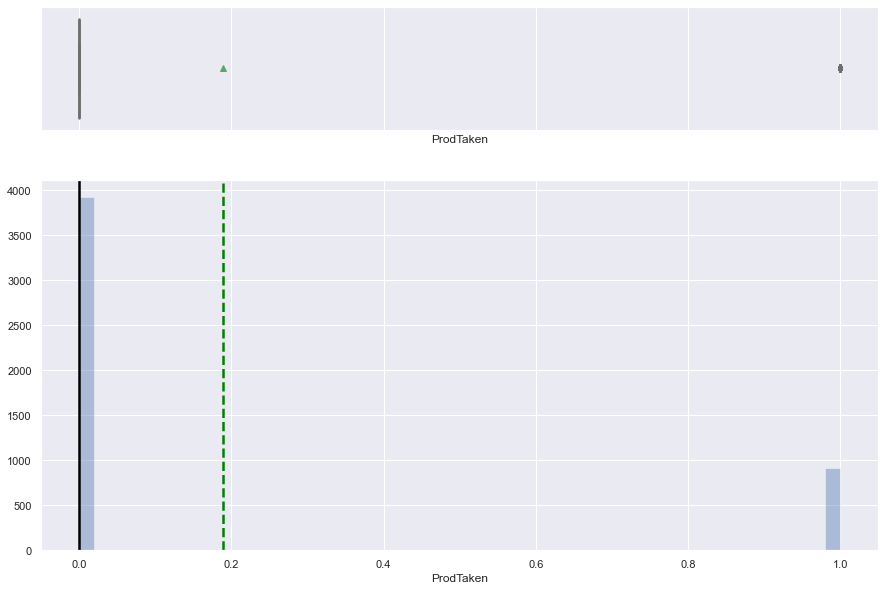

In [302]:
histogram_boxplot(data['ProdTaken'])

- *ProdTaken has only 2 values most of the products were not taken

**Observations on NumberOfPersonVisited**

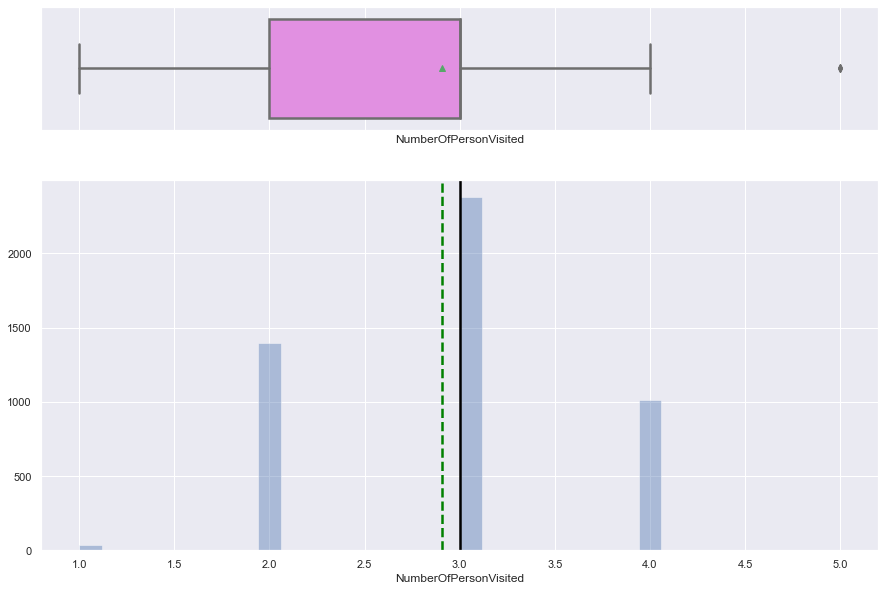

In [303]:
histogram_boxplot(data['NumberOfPersonVisited'])

- only 4 values are there

**Function to create barplots that indicate percentage for each category**

In [304]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=data)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

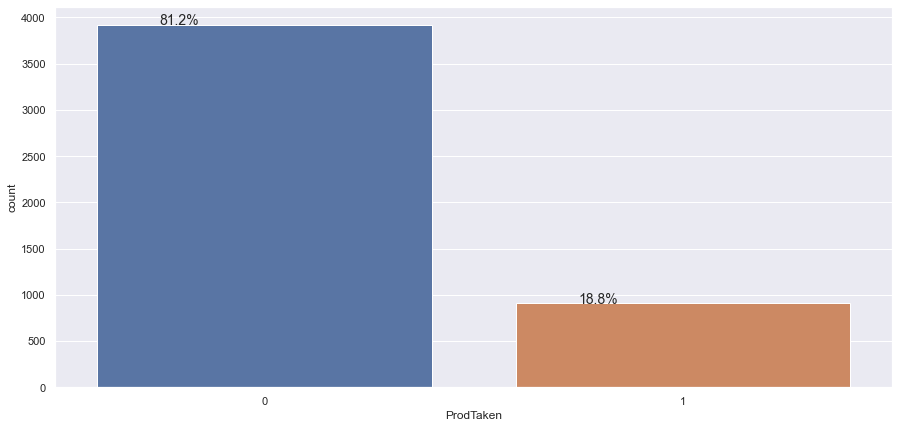

In [305]:
perc_on_bar(data['ProdTaken'])

- 81.2% people have not taken the product as compared to 18.8% who have taken so its almost 4 times likely for someone not to buy a product

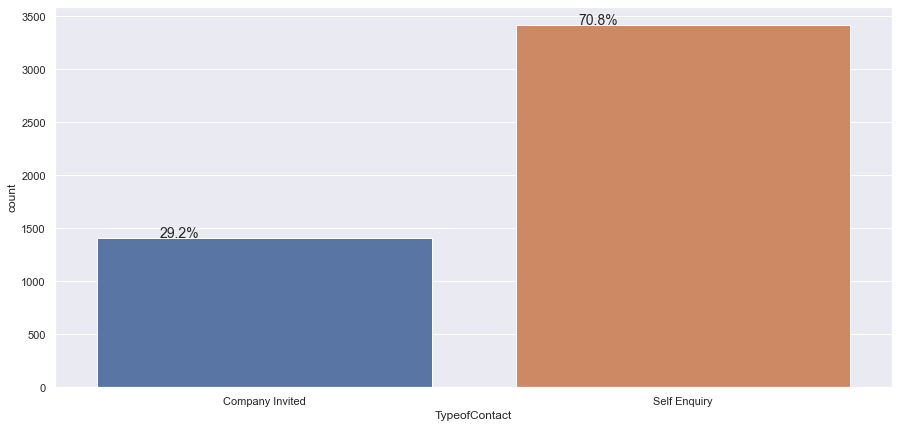

In [306]:
perc_on_bar(data['TypeofContact'])

- 70.5% came in Self Enquiry while 29% came from company invited. There is scope for company to invite more

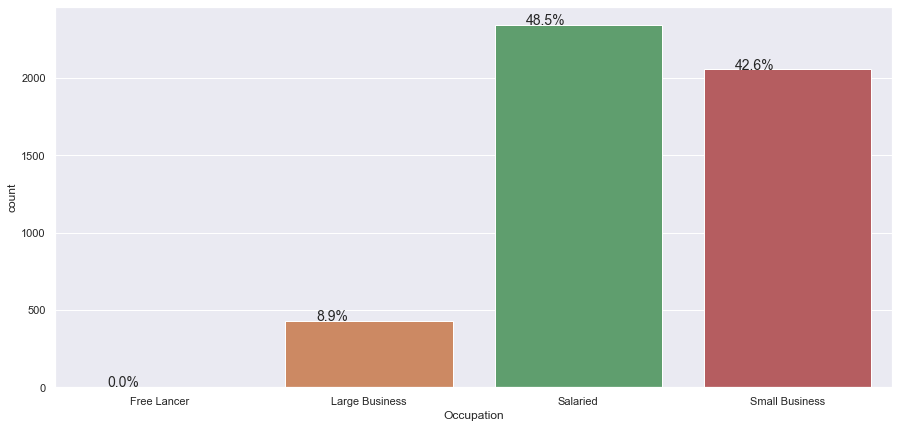

In [307]:
perc_on_bar(data['Occupation'])

- 70.5% came in Self Enquiry while 29% came from company invited. There is scope for company to invite more

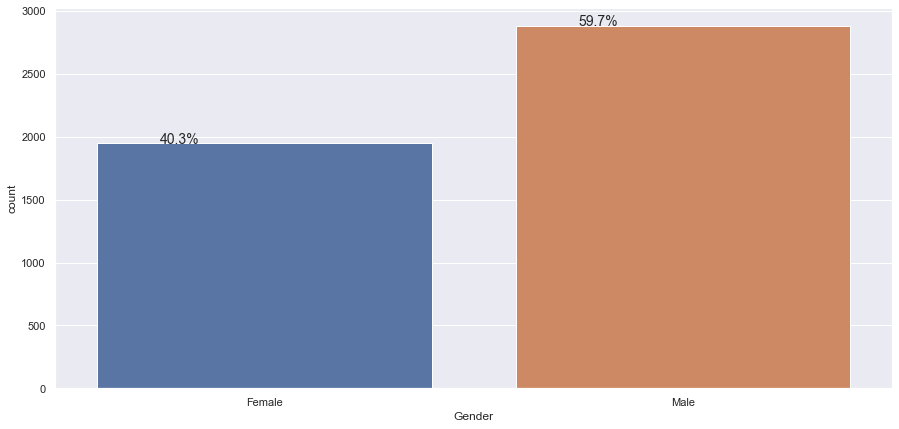

In [308]:
perc_on_bar(data['Gender'])

- more males were contacted compared to females. More Females should be contacted going forward

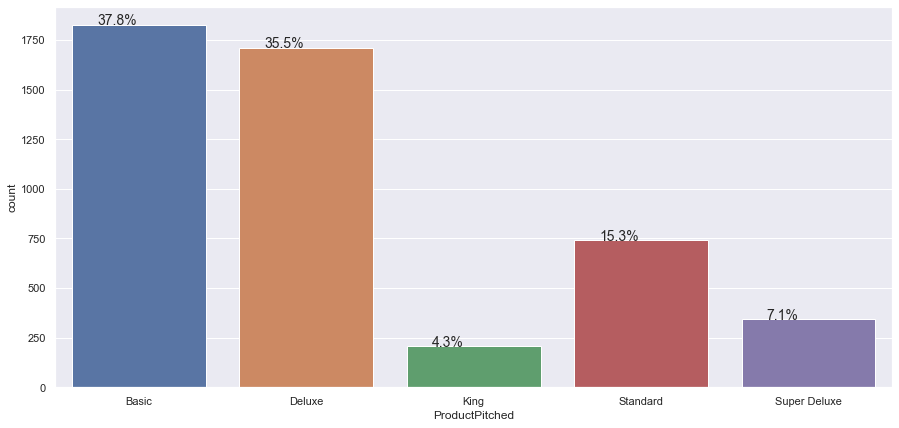

In [309]:
perc_on_bar(data['ProductPitched'])

- Basic and Deluxe were pitched the most

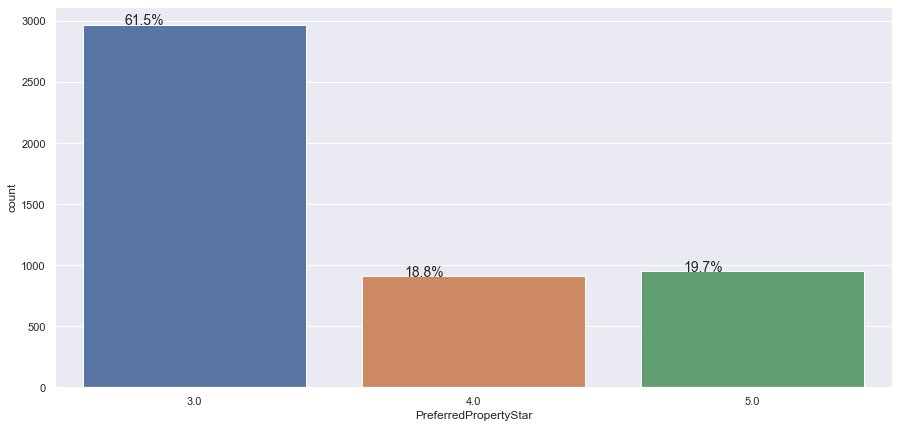

In [310]:
perc_on_bar(data['PreferredPropertyStar'])

- 3 star was rated the most with 5 and 4 close 2nd. Need to improve quality of service

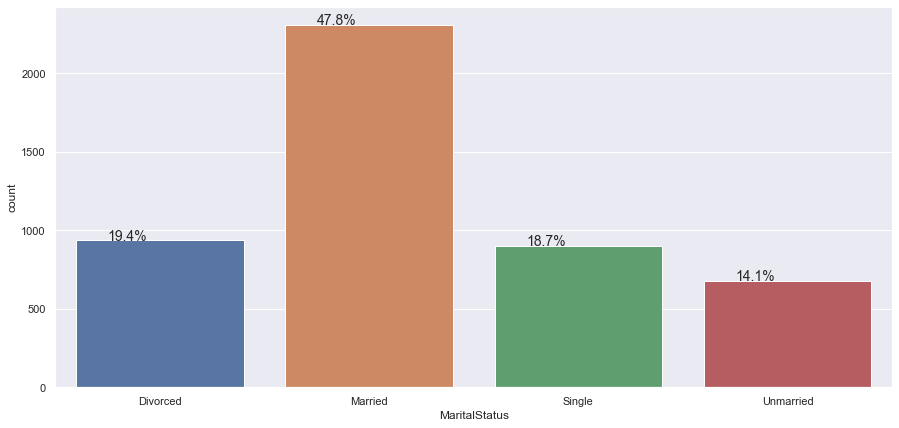

In [311]:
perc_on_bar(data['MaritalStatus'])

- Married people travel the most so more conact should be made with married people

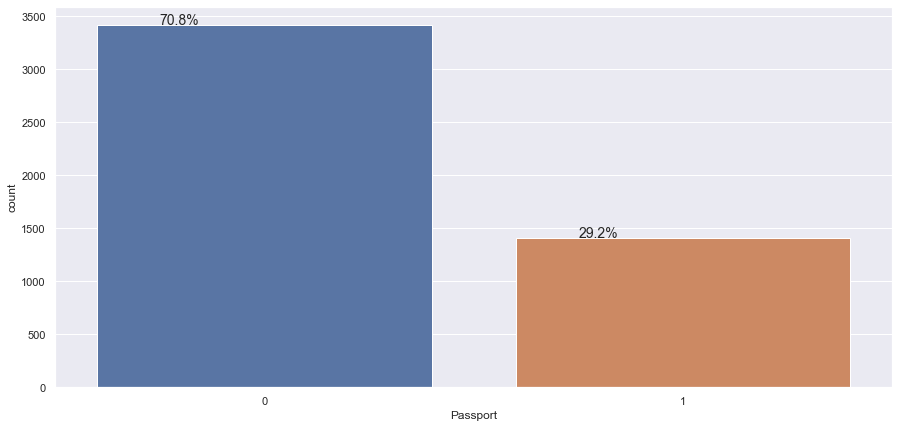

In [312]:
perc_on_bar(data['Passport'])

- Interestingly 70.9% people didnt have passport which means they travel inside country

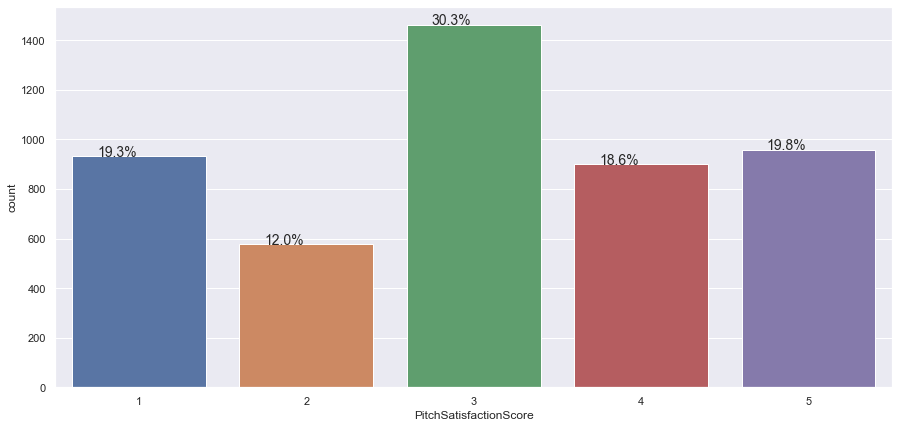

In [313]:
perc_on_bar(data['PitchSatisfactionScore'])

- Less than 40% rating was for 4 and 5 star. Quality of pitching needs to improve

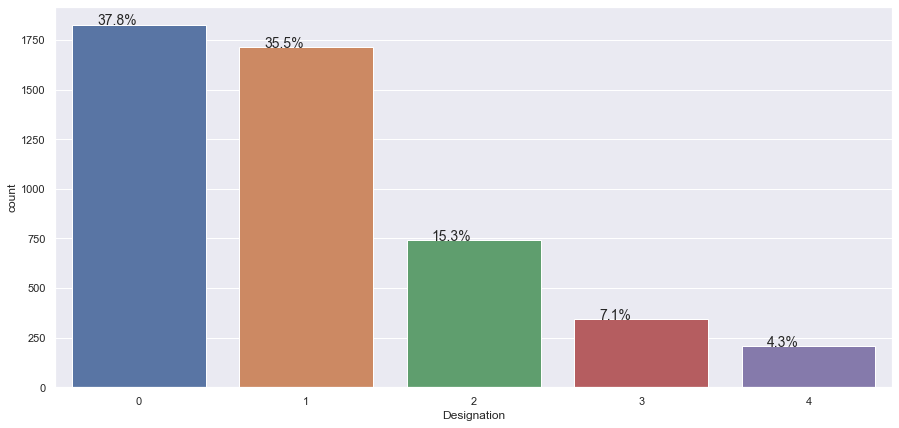

In [314]:
perc_on_bar(data['Designation'])

- Executive and Managers were contacted the most

### Bivariate analysis

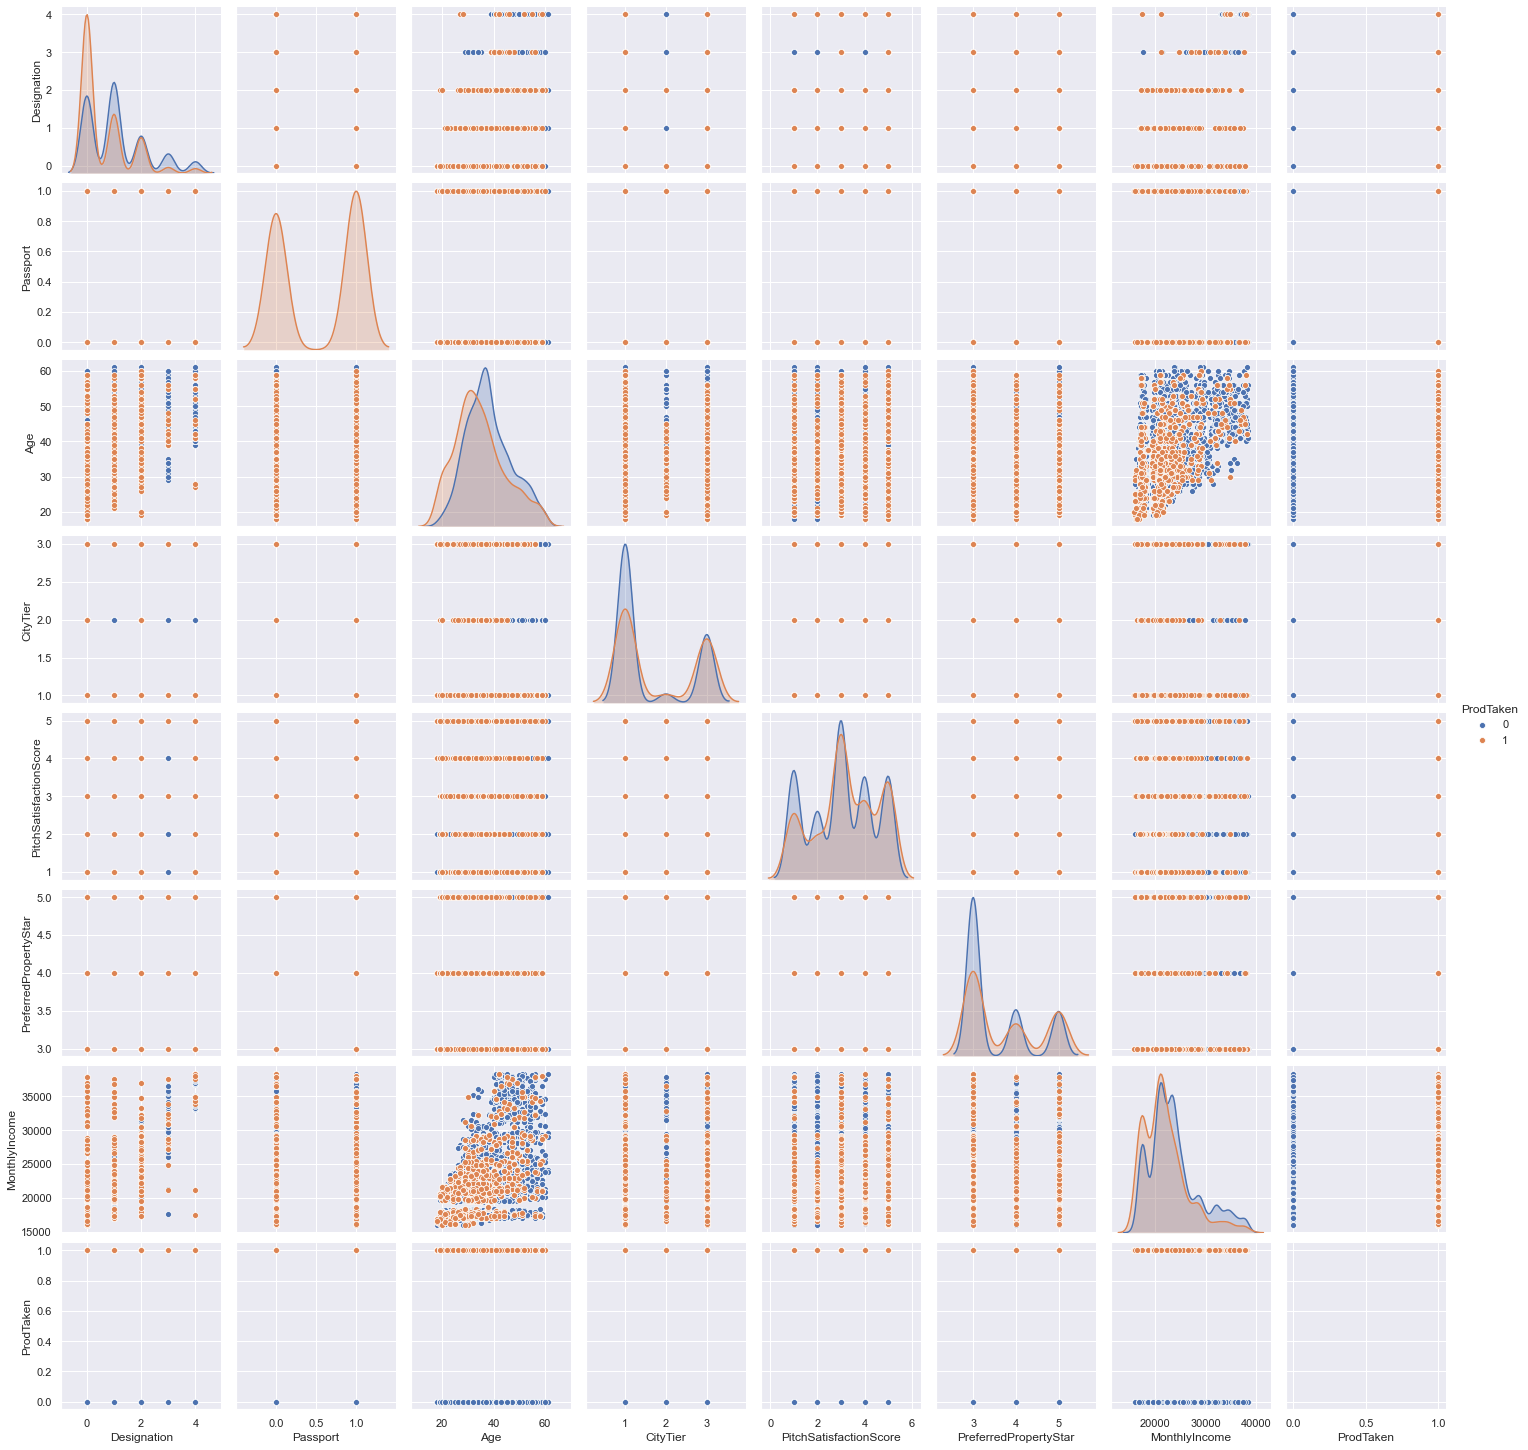

In [315]:
sns.pairplot(data,x_vars=['Designation',
'Passport',
'Age',
'CityTier',
'PitchSatisfactionScore',
'PreferredPropertyStar',
'MonthlyIncome',
'ProdTaken'],
 y_vars=[
'Designation',
'Passport',
'Age',
'CityTier',
'PitchSatisfactionScore',
'PreferredPropertyStar',
'MonthlyIncome',
'ProdTaken'
] ,kind='scatter',diag_kind='kde',hue='ProdTaken'
) 
plt.show()

- None of the number fields Designation,Passport,Age,CityTier,PitchSatisfactionScore,PreferredPropertyStar,
MonthlyIncome seem to have serious impact on the ProdTaken field

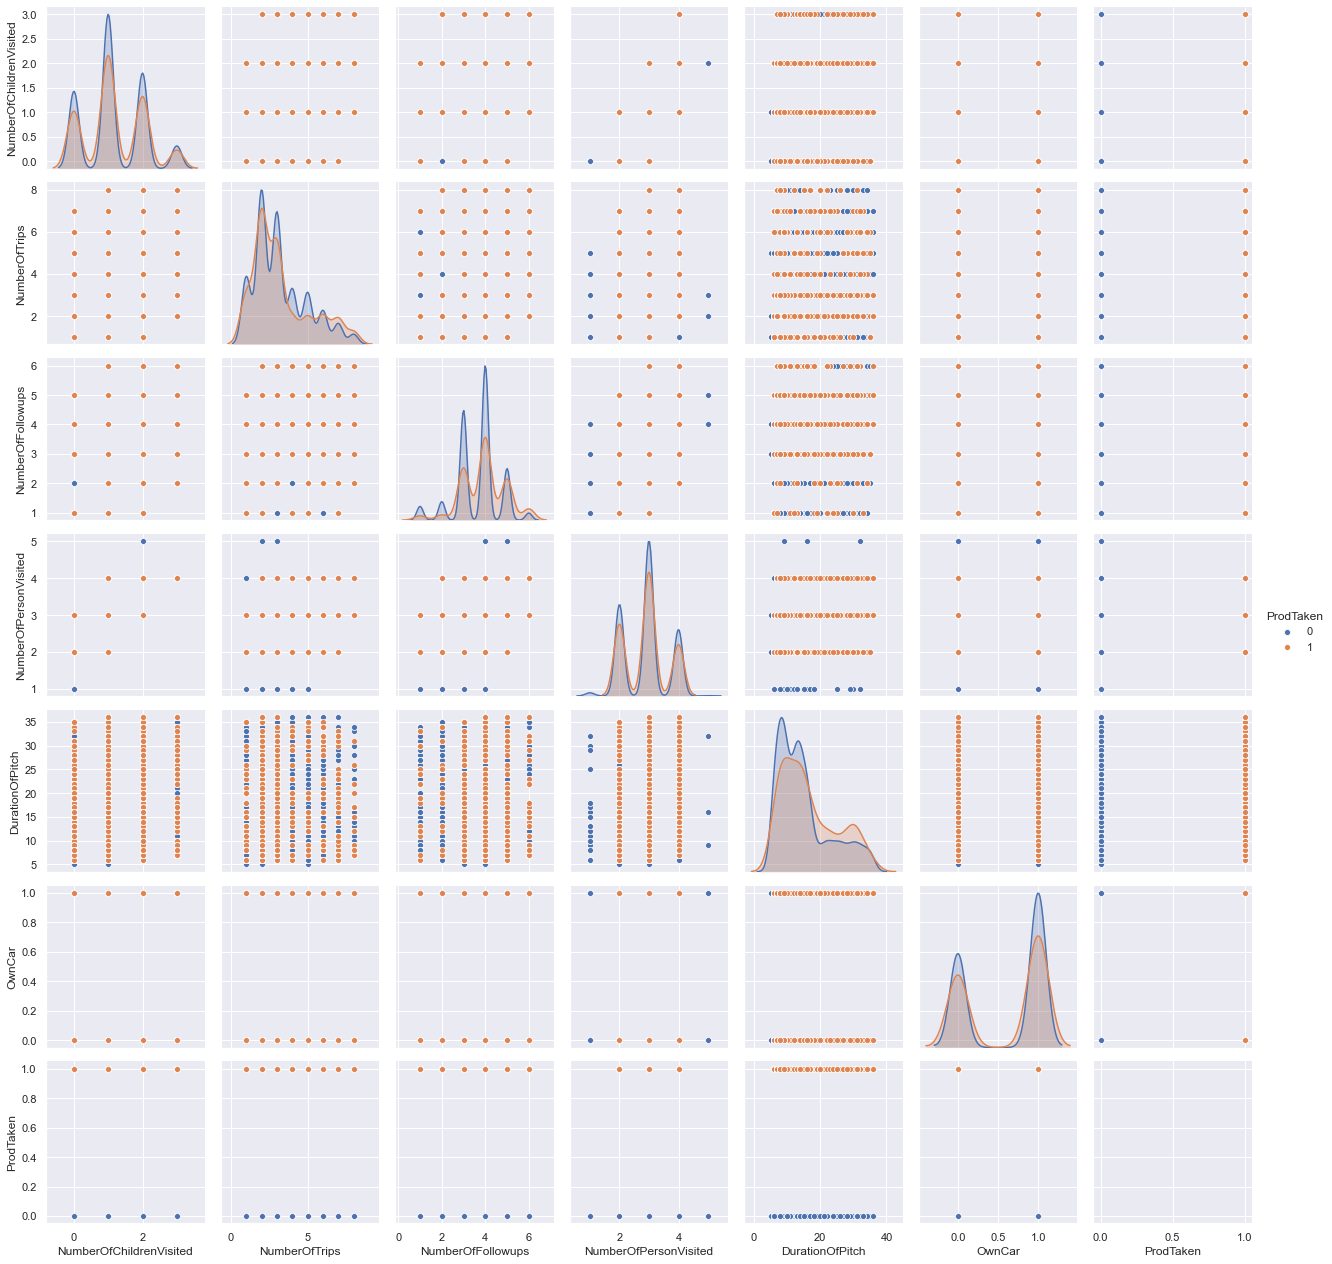

In [316]:
sns.pairplot(data,x_vars=[
'NumberOfChildrenVisited',
'NumberOfTrips',
'NumberOfFollowups',
'NumberOfPersonVisited',
'DurationOfPitch',
'OwnCar',
'ProdTaken'],
 y_vars=[
'NumberOfChildrenVisited',
'NumberOfTrips',
'NumberOfFollowups',
'NumberOfPersonVisited',
'DurationOfPitch',
'OwnCar',
'ProdTaken'
] ,kind='scatter',diag_kind='kde',hue='ProdTaken'
) 
plt.show()

- None of the number fields NumberOfChildrenVisited,NumberOfTrips,NumberOfFollowups,NumberOfPersonVisited,
DurationOfPitch,OwnCar,MonthlyIncome seem to have serious impact on the ProdTaken field

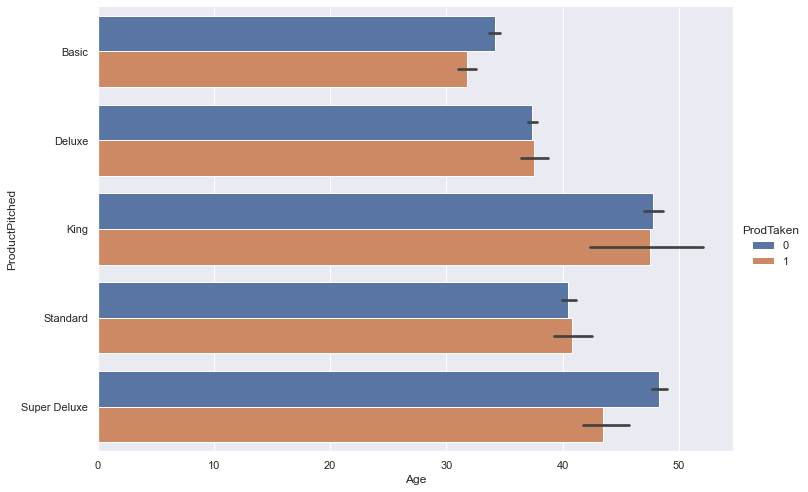

In [317]:
sns.catplot(x="Age", y="ProductPitched",hue='ProdTaken', data=data, kind='bar', height=7, aspect=1.5, estimator=np.mean);

- Average age of people who chose King product was close to 50 years of age

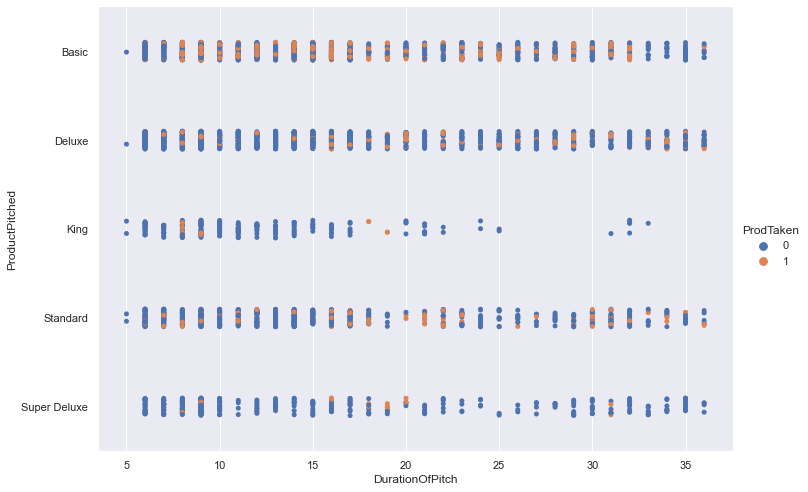

In [318]:
sns.catplot(x="DurationOfPitch", y="ProductPitched", hue='ProdTaken', data=data, kind='strip', height=7, aspect=1.5, estimator=np.mean);

- Basic seems to have more ProdTaken so there can be a relation between DurationOfPitach and ProductPurchased

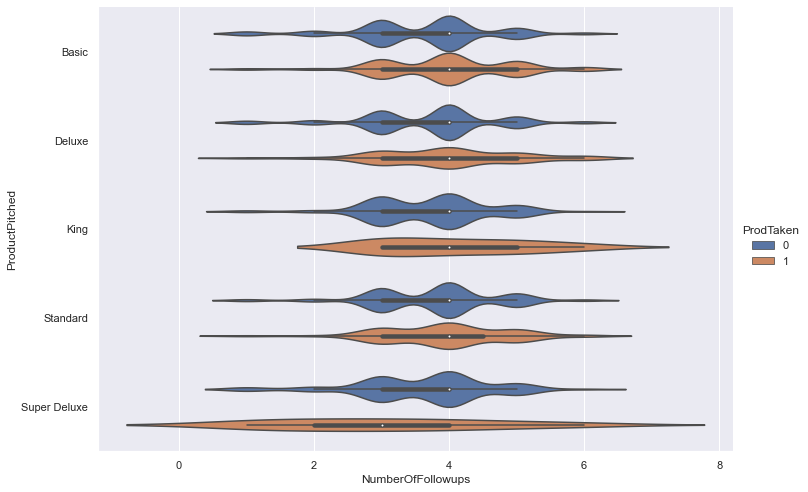

In [319]:
sns.catplot(x="NumberOfFollowups", y="ProductPitched", hue='ProdTaken', data=data, kind='violin', height=7, aspect=1.5, estimator=np.mean);

- most of the data is centred around 3-4 NumberOfFollowups

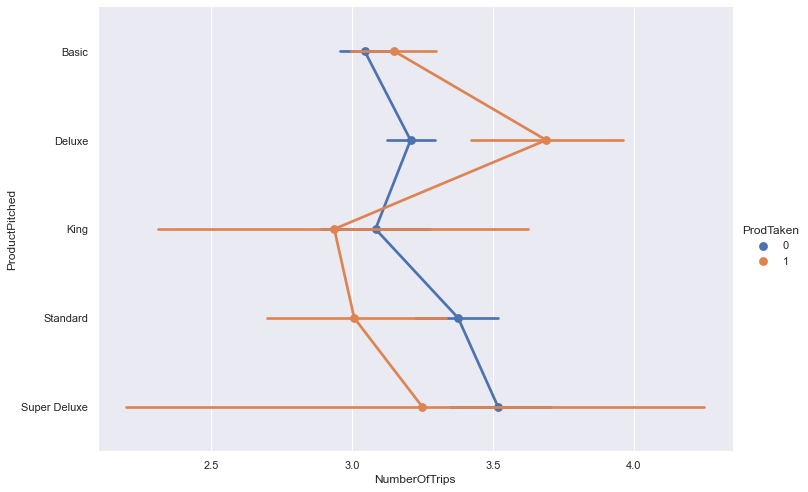

In [320]:
sns.catplot(x="NumberOfTrips", y="ProductPitched", hue='ProdTaken', data=data, kind='point', height=7, aspect=1.5, estimator=np.mean);

- Delux ssems to be preferred more by people with more NumberOfTrips whereas SuPer Delux has more variance

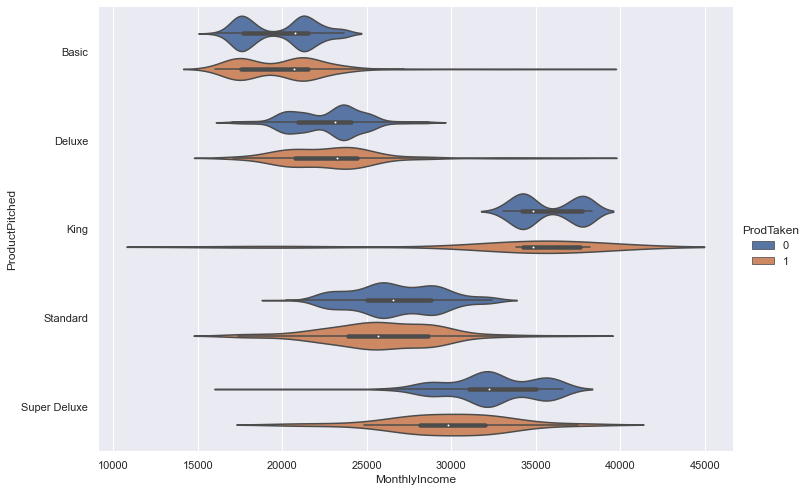

In [321]:
sns.catplot(x="MonthlyIncome", y="ProductPitched", hue='ProdTaken', data=data, kind='violin', height=7, aspect=1.5, estimator=np.mean);

- People with MonthlyIncome between 20000 to 30000 seem to go with Standard more and people with MonthlyIncome between 25000 to 40000 seem to go with Super Delux more

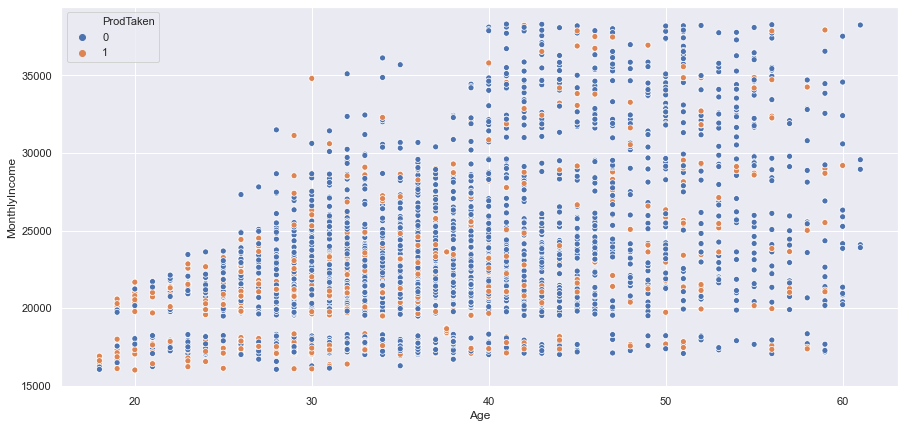

In [322]:
sns.scatterplot(data=data, x="Age", y="MonthlyIncome", hue="ProdTaken")

- orange seems to be more towards below 45 which means older people dont travel much
- MonthlyIncome above 30k seems to be more for 40 years and older but above 40k we see more blue meaning  it doesnt impact travel much

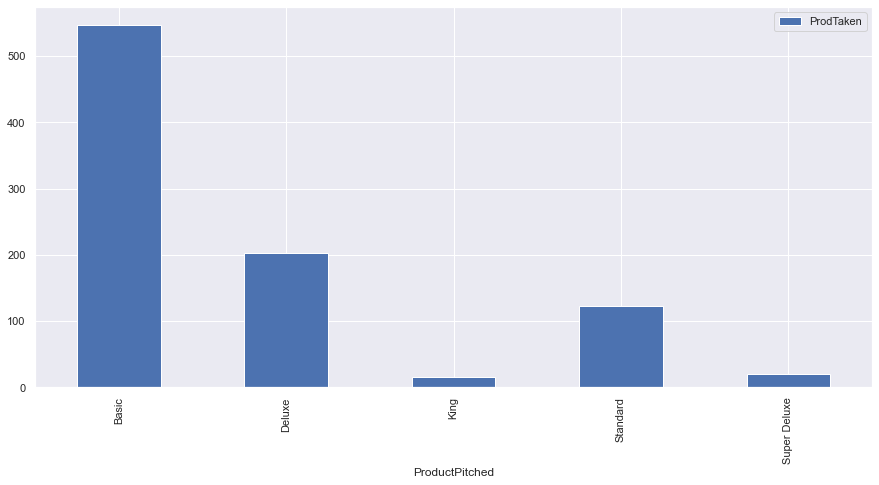

In [323]:
sns.set(rc={'figure.figsize':(15,7)})
pd.pivot_table(data=data, index=['ProductPitched'], values='ProdTaken', aggfunc=np.sum).plot(kind='bar');

- Basic has the highest number of ProdTaken(around 552) which means more concentration should be done in that segment.

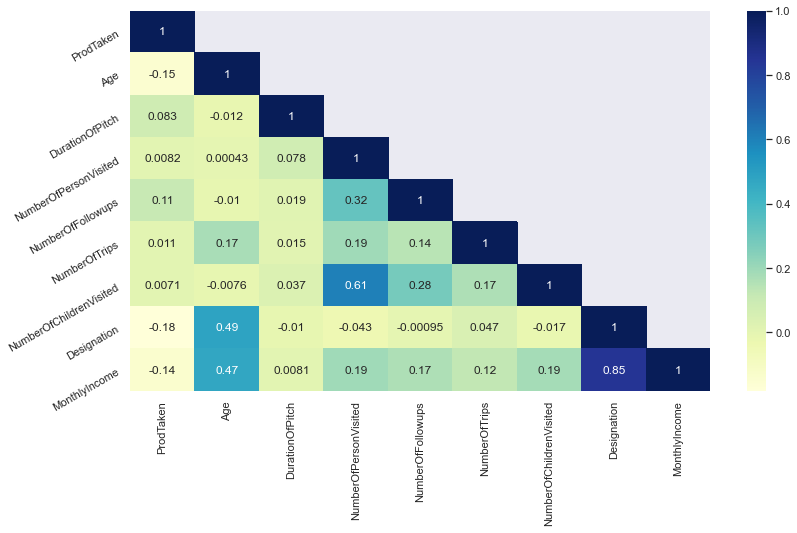

In [324]:
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True,cmap="YlGnBu")
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

- NumberofPersonVIsited and NumberofChildenVIsited seems to be slightly related befcause of obvious reasons but its not very high so we can keep both.
- Designation and MonthlyIncome seem to be very much related but we can keep it as the metrics are performing better keeping them both

## Key Relationship between Variables
- NumberofPersonVIsited and NumberofChildenVIsited seems to be slightly related befcause of obvious reasons but its not very high so we can keep both.
- most of the other variables seem to be not related
- Basic has the highest number of ProdTaken(around 552) which means more concentration should be done in that segment.
- Older people dont travel much
- People with MonthlyIncome between 20000 to 30000 seem to go with Standard more and people with MonthlyIncome between 25000 to 40000 seem to go with Super Delux more
- Delux ssems to be preferred more by people with more NumberOfTrips whereas SuPer Delux has more variance
- To increase the chances of selling a product around 3-4 NumberOfFollowups are good bet
- Average age of people who chose King product was close to 50 years of age
- Executive and Managers were contacted the most

# Data Pre-processing part 2

In [325]:
data=pd.get_dummies(data,columns=['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Passport','OwnCar'],drop_first=True)


### Normalizing the Age,MonthlyIncome and DurationofPitch columns

In [326]:
cols_to_norm = ['Age','DurationOfPitch','MonthlyIncome']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4828 entries, 0 to 4887
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   ProdTaken                    4828 non-null   int64   
 1   Age                          4828 non-null   float64 
 2   CityTier                     4828 non-null   category
 3   DurationOfPitch              4828 non-null   float64 
 4   NumberOfPersonVisited        4828 non-null   int64   
 5   NumberOfFollowups            4828 non-null   float64 
 6   PreferredPropertyStar        4828 non-null   category
 7   NumberOfTrips                4828 non-null   float64 
 8   PitchSatisfactionScore       4828 non-null   category
 9   NumberOfChildrenVisited      4828 non-null   float64 
 10  Designation                  4828 non-null   int8    
 11  MonthlyIncome                4828 non-null   float64 
 12  TypeofContact_Self Enquiry   4828 non-null   uint8   
 13  Occ

## Split the dataset

In [328]:
# Separating features and the target column
X = data.drop('ProdTaken', axis=1)
y = data['ProdTaken']

In [329]:
# Splitting the data into train and test sets in 80:20 ratio because thats how the 1 and 0 is distributed in ProdTaken
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True,stratify=y)

In [330]:
X_train.shape, X_test.shape

((3862, 25), (966, 25))

# Building Models

## Defining Metrics

- Before building the model, let's create functions to calculate different metrics- Accuracy, Recall and Precision and plot the confusion matrix.

In [331]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [332]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    #f1 score of the model
    train_f1=metrics.f1_score(y_train,pred_train)
    test_f1=metrics.f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 Score on test set : ",metrics.f1_score(y_test,pred_test))        
    
    return score_list # returning the list with train and test scores

## Decision Tree Model

In [333]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree= DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [334]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Designation                  0.352598
Passport_1                   0.326254
Age                          0.165325
CityTier                     0.072013
PitchSatisfactionScore       0.044726
PreferredPropertyStar        0.039084
Gender_Male                  0.000000
MaritalStatus_Unmarried      0.000000
MaritalStatus_Single         0.000000
MaritalStatus_Married        0.000000
ProductPitched_Super Deluxe  0.000000
ProductPitched_Standard      0.000000
ProductPitched_King          0.000000
ProductPitched_Deluxe        0.000000
Occupation_Large Business    0.000000
Occupation_Small Business    0.000000
Occupation_Salaried          0.000000
TypeofContact_Self Enquiry   0.000000
MonthlyIncome                0.000000
NumberOfChildrenVisited      0.000000
NumberOfTrips                0.000000
NumberOfFollowups            0.000000
NumberOfPersonVisited        0.000000
DurationOfPitch              0.000000
OwnCar_1                     0.000000


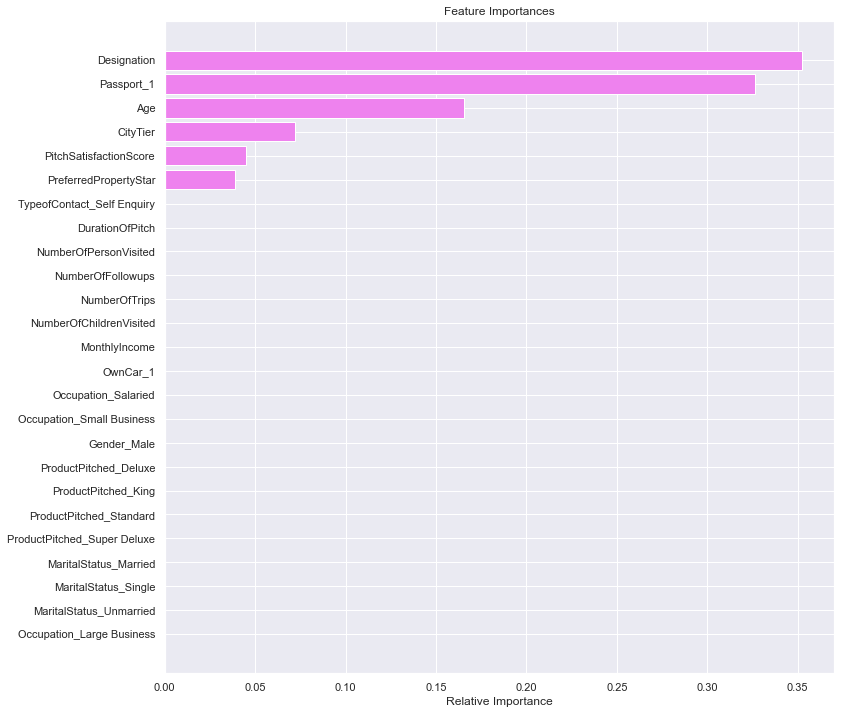

In [335]:
feature_names = X_train.columns
importances = dtree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Passport_1,Designation and Age are the most important features

In [336]:
dtree_score=get_metrics_score(dtree)

Accuracy on training set :  0.8355774210253755
Accuracy on test set :  0.8240165631469979
Recall on training set :  0.23521320495185694
Recall on test set :  0.1978021978021978
Precision on training set :  0.684
Precision on test set :  0.6
F1 Score on training set :  0.3500511770726714
F1 Score on test set :  0.2975206611570248


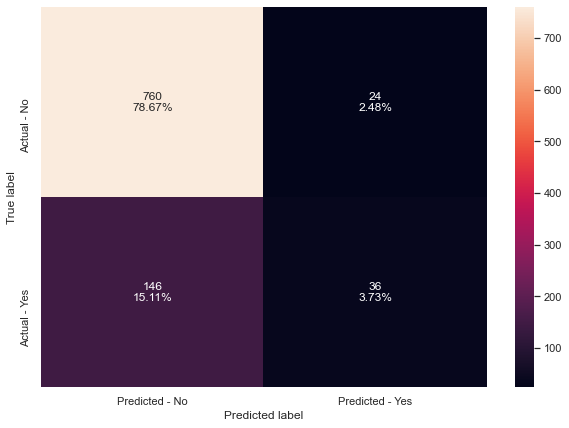

In [337]:
make_confusion_matrix(dtree,y_test)

### Insights

- We can see that accuracy,Recall and Precision all are very low
- The training and test accuracy are almost matching which means there isnt overfitting
- Tried with other metrices but not much change in metrices

## Random Forest Model

In [338]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [339]:
dtree_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9254658385093167
Recall on training set :  1.0
Recall on test set :  0.6703296703296703
Precision on training set :  1.0
Precision on test set :  0.9104477611940298
F1 Score on training set :  1.0
F1 Score on test set :  0.7721518987341772


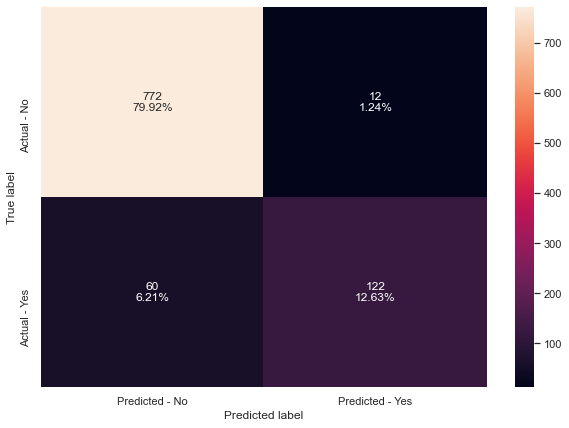

In [340]:
make_confusion_matrix(rf_estimator,y_test)

### Insights

- All the 3 metrices went up drastically. which means we should definetly prefer Random forest over Decision trees for this dataset
- All the 3 metrices are 1 for the training data which means it is hugely overfit

## Bagging

In [341]:
from sklearn.ensemble import BaggingClassifier
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [342]:
dtree_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9945624029000518
Accuracy on test set :  0.9316770186335404
Recall on training set :  0.9724896836313618
Recall on test set :  0.7142857142857143
Precision on training set :  0.998587570621469
Precision on test set :  0.9027777777777778
F1 Score on training set :  0.9853658536585367
F1 Score on test set :  0.7975460122699387


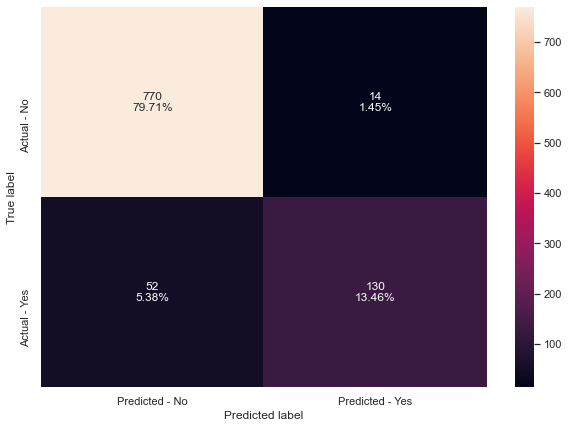

In [343]:
make_confusion_matrix(bagging_estimator,y_test)

### Insights

- All the 3 metrices are almost same like random forest so not much gain
- Training data metrices are slighly less than 1 which means its not overfitting like random forest but still there is room for improvement

# Boosting

### AdaBoost

In [344]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [345]:
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8573278094251683
Accuracy on test set :  0.8416149068322981
Recall on training set :  0.35213204951856947
Recall on test set :  0.33516483516483514
Precision on training set :  0.7619047619047619
Precision on test set :  0.6559139784946236
F1 Score on training set :  0.4816556914393227
F1 Score on test set :  0.44363636363636355


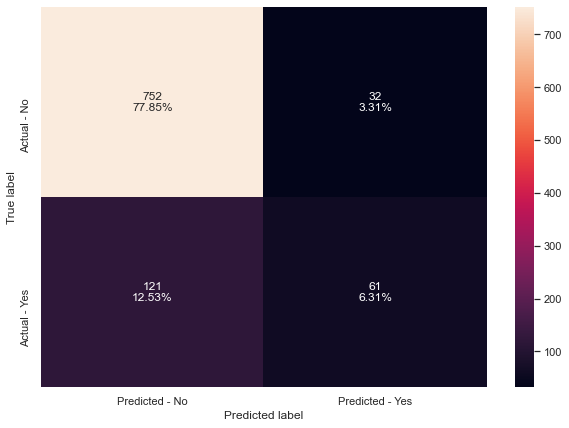

In [346]:
make_confusion_matrix(abc,y_test)

### Insights

- All the 3 metrices have gone down drastically as compared to above 3
- However training and test metrices are almost matching which means there is no overfitting
- Tried with other parameters but not much change in metrices

### Gradient Boosting Classifier

In [347]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [348]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8909891248058001
Accuracy on test set :  0.860248447204969
Recall on training set :  0.5034387895460798
Recall on test set :  0.43956043956043955
Precision on training set :  0.8591549295774648
Precision on test set :  0.7079646017699115
F1 Score on training set :  0.634865568083261
F1 Score on test set :  0.5423728813559322


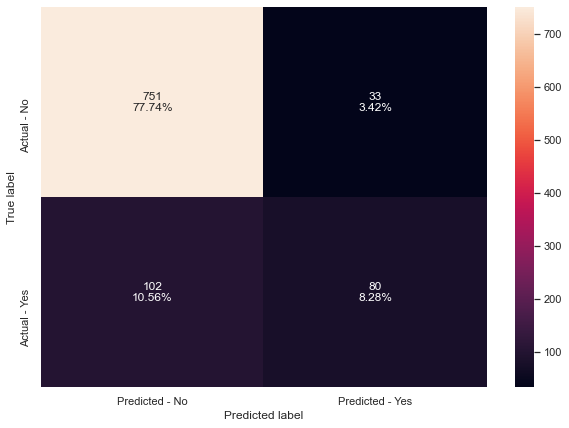

In [349]:
make_confusion_matrix(gbc,y_test)

### Insights

- All the 3 metrices have improves as comapred to adaboost. Recall and preceision has increased drastically but still there is room for improvement
- Test and train metrices are almost matching which means there is no overfitting

### XGBoost

In [350]:
from xgboost import XGBClassifier
X_train['CityTier'] = pd.to_numeric(X_train['CityTier'])
X_train['PreferredPropertyStar'] = pd.to_numeric(X_train['PreferredPropertyStar'])
X_train['PitchSatisfactionScore'] = pd.to_numeric(X_train['PitchSatisfactionScore'])
X_test['CityTier'] = pd.to_numeric(X_test['CityTier'])
X_test['PreferredPropertyStar'] = pd.to_numeric(X_test['PreferredPropertyStar'])
X_test['PitchSatisfactionScore'] = pd.to_numeric(X_test['PitchSatisfactionScore'])
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

[20:30:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [351]:
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9994821336095288
Accuracy on test set :  0.9399585921325052
Recall on training set :  0.9972489683631361
Recall on test set :  0.7637362637362637
Precision on training set :  1.0
Precision on test set :  0.9025974025974026
F1 Score on training set :  0.9986225895316804
F1 Score on test set :  0.8273809523809523


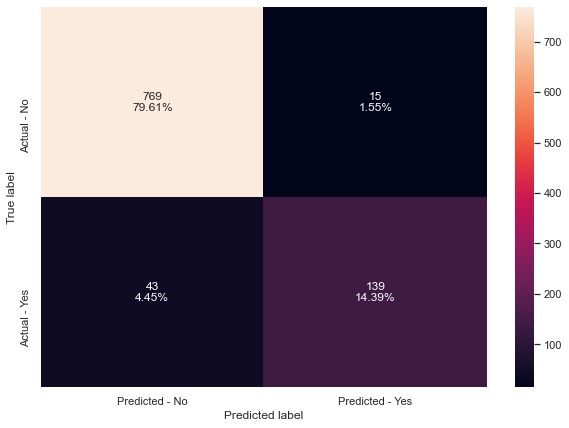

In [352]:
make_confusion_matrix(xgb,y_test)

### Insights

- All the 3 parameters are the best so far we have seen
- However training metrices are close to 1 so there is overfitting

### XGBoost Classifier Hyperparameters tuned manually

In [353]:
from xgboost import XGBClassifier
X_train['CityTier'] = pd.to_numeric(X_train['CityTier'])
X_train['PreferredPropertyStar'] = pd.to_numeric(X_train['PreferredPropertyStar'])
X_train['PitchSatisfactionScore'] = pd.to_numeric(X_train['PitchSatisfactionScore'])
X_test['CityTier'] = pd.to_numeric(X_test['CityTier'])
X_test['PreferredPropertyStar'] = pd.to_numeric(X_test['PreferredPropertyStar'])
X_test['PitchSatisfactionScore'] = pd.to_numeric(X_test['PitchSatisfactionScore'])
xgb_tuned=XGBClassifier(base_score=0.7, booster='gbtree', colsample_bylevel=1,colsample_bynode=1,
               colsample_bytree=1, gamma=0, gpu_id=-1,importance_type='total_cover', interaction_constraints='',
              learning_rate=0.55, max_delta_step=0, max_depth=7,min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,reg_alpha=0,reg_lambda=1,
            scale_pos_weight=1, subsample=1,tree_method='exact', validate_parameters=1, verbosity=None)
xgb_tuned.fit(X_train,y_train)

[20:30:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.7, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='total_cover', interaction_constraints='',
              learning_rate=0.55, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [354]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9616977225672878
Recall on training set :  1.0
Recall on test set :  0.8516483516483516
Precision on training set :  1.0
Precision on test set :  0.9393939393939394
F1 Score on training set :  1.0
F1 Score on test set :  0.8933717579250721


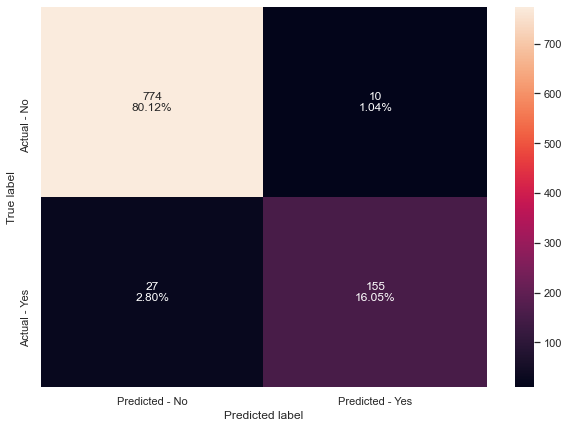

In [355]:
make_confusion_matrix(xgb_tuned,y_test)

### Insights

- Hyperparameter tuning was running forever thats why was trying different combinations myself and this is the combination that gave me the best result
- All the 3 parameters are the best so far we have seen
- However training metrices are close to 1 so there is overfitting

### Gradient Boosting Classifier with XGBoost Classifier init

In [356]:
gbc_init = GradientBoostingClassifier(init=XGBClassifier(base_score=0.7, booster='gbtree', colsample_bylevel=1,colsample_bynode=1,
               colsample_bytree=1, gamma=0, gpu_id=-1,importance_type='total_cover', interaction_constraints='',
              learning_rate=0.55, max_delta_step=0, max_depth=7,min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,reg_alpha=0,reg_lambda=1,
            scale_pos_weight=1, subsample=1,tree_method='exact', validate_parameters=1, verbosity=None),random_state=1)
gbc_init.fit(X_train,y_train)

[20:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GradientBoostingClassifier(init=XGBClassifier(base_score=0.7, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              gpu_id=-1,
                                              importance_type='total_cover',
                                              interaction_constraints='',
                                              learning_rate=0.55,
                                              max_delta_step=0, max_depth=7,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints='()',
                                              n_estimators=100, n_jobs=8,
                                              num_parallel_tree=1,
                                              random_state=1, reg_al

In [357]:
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  1.0
Accuracy on test set :  0.9637681159420289
Recall on training set :  1.0
Recall on test set :  0.8571428571428571
Precision on training set :  1.0
Precision on test set :  0.9454545454545454
F1 Score on training set :  1.0
F1 Score on test set :  0.899135446685879


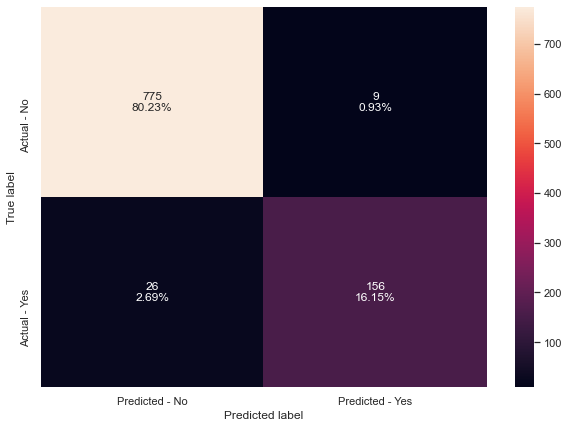

In [358]:
make_confusion_matrix(gbc_init,y_test)

### Insights

- This is the best metrices we have seen so far

# StackingClassifier

In [359]:
from sklearn.ensemble import StackingClassifier
 
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('XGB', XGBClassifier(base_score=0.7, booster='gbtree', colsample_bylevel=1,colsample_bynode=1,
               colsample_bytree=1, gamma=0, gpu_id=-1,importance_type='total_cover', interaction_constraints='',
              learning_rate=0.55, max_delta_step=0, max_depth=7,min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,reg_alpha=0,reg_lambda=1,
            scale_pos_weight=1, subsample=1,tree_method='exact', validate_parameters=1, verbosity=None)))
    # define meta learner model
    level1 =GradientBoostingClassifier(random_state=1)
    model = StackingClassifier(estimators=level0, final_estimator=level1)
    return model
 
stack_model=get_stacking()
stack_model.fit(X_train,y_train)

[20:30:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:30:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:30:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:30:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

StackingClassifier(estimators=[('XGB',
                                XGBClassifier(base_score=0.7, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              gpu_id=-1,
                                              importance_type='total_cover',
                                              interaction_constraints='',
                                              learning_rate=0.55,
                                              max_delta_step=0, max_depth=7,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints='()',
                                              n_estimators=100, n_jobs=8,
                                              num_parallel_tree=1,
                             

In [360]:
stack_model_score=get_metrics_score(stack_model)

Accuracy on training set :  0.9966338684619368
Accuracy on test set :  0.953416149068323
Recall on training set :  0.9862448418156808
Recall on test set :  0.8571428571428571
Precision on training set :  0.9958333333333333
Precision on test set :  0.8914285714285715
F1 Score on training set :  0.9910158949550795
F1 Score on test set :  0.8739495798319327


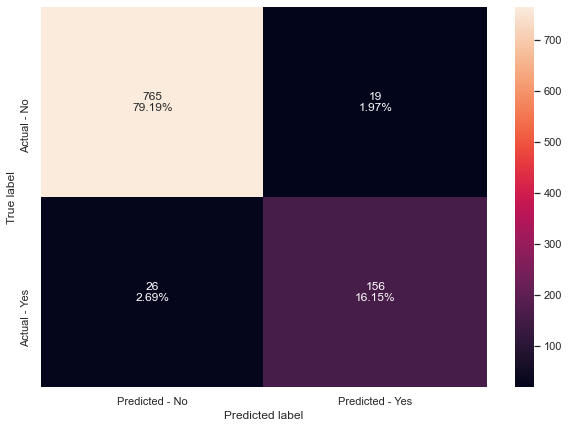

In [361]:
make_confusion_matrix(stack_model,y_test)

### Insights

- All the 3 metrics performance has gone down
- Also the training metrices are close to 1 showing there is overfitting

# Comparing all the models

In [362]:
# defining list of models
models = [dtree,rf_estimator,bagging_estimator,abc,  gbc,xgb, xgb_tuned,gbc_init,stack_model]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train=[]
f1_test=[]

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_train.append(np.round(j[6],2))
    f1_test.append(np.round(j[7],2))    

In [363]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Random Forest', 
                                          'Bagging','Ada Boost',
                                          'Gradient Boost','XGBoost',
                                          'XGBoost Manually Tuned','Gradient Boost with XGBoost init',
                                          'Stacking Gradient on XGBoost'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                        'Train F1 Score':f1_train,'Test F1 Score':f1_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train F1 Score,Test F1 Score
0,Decision Tree,0.84,0.82,0.24,0.20,0.68,0.60,0.35,0.30
1,Random Forest,1.00,0.93,1.00,0.67,1.00,0.91,1.00,0.77
2,Bagging,0.99,0.93,0.97,0.71,1.00,0.90,0.99,0.80
3,Ada Boost,0.86,0.84,0.35,0.34,0.76,0.66,0.48,0.44
4,Gradient Boost,0.89,0.86,0.50,0.44,0.86,0.71,0.63,0.54
5,XGBoost,1.00,0.94,1.00,0.76,1.00,0.90,1.00,0.83
6,XGBoost Manually Tuned,1.00,0.96,1.00,0.85,1.00,0.94,1.00,0.89
7,Gradient Boost with XGBoost init,1.00,0.96,1.00,0.86,1.00,0.95,1.00,0.90
8,Stacking Gradient on XGBoost,1.00,0.95,0.99,0.86,1.00,0.89,0.99,0.87


### Insights

- We are using Accuracy,Recall and Precision as metrics because this is a classification problem as we have only 2 classes whether the customer bought the product or not
- Accuracy= TP+TN/TP+FP+FN+TN
- Precision= TP/TP+FP
- Recall= TP/TP+FN
- Low precision means high false positives means Model is saying customer will buy a product when in actual they wont.This will cause waste of effort in trying to convince a not so likely customer
- Low recall means model is saying customer will not buy a product when in actual they will. To me this is more important because the customer is already willing to buy the product and not much effort is needed to sell.
- "Gradient Boost with XGBoost init" is clearly the winner as its got best all 3 metrices
- XGBoost Manually Tuned is next best 
- Accuracy=0.96, Precision=0.95 and f1 score=0.90 are excellent numbers we shouldnt try to improve more or will cause overfitting on test data
- Designation, passport and age are very influential parameters. So try to pitch for people with higher designation or people with passport or lower age.
- Less than 40% rating was for 4 and 5 star. Quality of pitching needs to improve
- Average age of people who chose King product was close to 50 years of age
- 3-4 followups might be required to convince the customer
- improve the quality of Delux product as it is bought most
- People with MonthlyIncome between 20000 to 30000 seem to go with Standard more and people with MonthlyIncome between 25000 to 40000 seem to go with Super Delux more
- People over 45 dont travel much
- Salary doesnt impact travel much
- Basic has the highest number of ProdTaken(around 552) which means more concentration should be done in that segment.